## Data analysis of our final dataset

Importing librairies

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.express as px
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

Path to Data

In [2]:
DATA_PATH = "../data/"

In [34]:
df = pd.read_csv(DATA_PATH + 'final_data.csv')

In [35]:
df.head()

,num_feature_0,num_feature_1,num_feature_2,num_feature_3,num_feature_4,num_feature_5,num_feature_6,num_feature_7,num_feature_8,num_feature_9,...,num_feature_759,num_feature_760,num_feature_761,num_feature_762,num_feature_763,num_feature_764,num_feature_765,num_feature_766,num_feature_767,target_category
0,-0.347906,0.298659,0.306194,0.055175,-0.430964,-0.466804,-0.108935,0.225360,0.385942,0.492067,...,-0.174081,-0.516293,0.402670,-0.094396,0.222461,0.574193,-0.606644,-0.461940,0.539914,computer vision
1,-0.381965,0.317170,0.336794,0.081098,-0.454720,-0.551013,-0.051526,0.256912,0.381023,0.474694,...,-0.182501,-0.524450,0.344222,-0.027710,0.259213,0.608695,-0.722355,-0.420306,0.589060,clustering
2,-0.334516,0.283154,0.291431,0.043395,-0.385153,-0.494500,-0.111106,0.227195,0.380586,0.548708,...,-0.169292,-0.530989,0.416996,-0.104790,0.218367,0.636691,-0.612310,-0.446481,0.508087,computer vision
3,-0.275612,0.267364,0.266519,0.076538,-0.282673,-0.329046,-0.045134,0.221697,0.293198,0.421586,...,-0.149041,-0.485052,0.493056,-0.112996,0.220296,0.618480,-0.594641,-0.469342,0.497985,nlp
4,-0.243645,0.288036,0.266372,0.109039,-0.166584,-0.294326,-0.053085,0.150146,0.304883,0.368951,...,-0.142109,-0.482496,0.465995,-0.077088,0.226020,0.523076,-0.427591,-0.406878,0.511194,classification


In [36]:
df.shape

(6260, 769)

In [37]:
df.isna().sum().sum()

0

In [38]:
frequency = df.target_category.value_counts()
counts = pd.DataFrame(columns=['Category', 'Frequency'])
counts.Category = frequency.index
counts.Frequency = frequency.values

<AxesSubplot:xlabel='Category', ylabel='Frequency'>

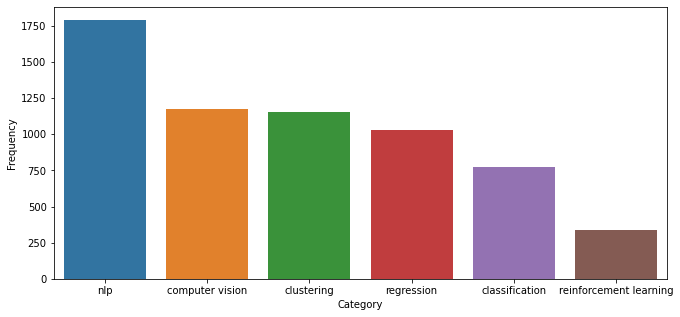

In [39]:
plt.figure(figsize=(11,5))
sns.barplot(x = 'Category', y = 'Frequency', data = counts)

##### Dimensionality reduction and visualisation

**PCA**

In [44]:
X = df.drop(['target_category'], axis=1).copy()

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=df['target_category'])
fig.show()

In [43]:
X = df.drop(['target_category'], axis=1).copy()

pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df['target_category'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

**t-SNE**

In [52]:
rndperm = np.random.permutation(df.shape[0])
df_subset = df.copy()
data_subset = df.drop(['target_category'], axis=1).copy().values

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)

c:\Users\dmasrour\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

c:\Users\dmasrour\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 6260 samples in 0.020s...
[t-SNE] Computed neighbors for 6260 samples in 0.482s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6260
[t-SNE] Computed conditional probabilities for sample 2000 / 6260
[t-SNE] Computed conditional probabilities for sample 3000 / 6260
[t-SNE] Computed conditional probabilities for sample 4000 / 6260
[t-SNE] Computed conditional probabilities for sample 5000 / 6260
[t-SNE] Computed conditional probabilities for sample 6000 / 6260
[t-SNE] Computed conditional probabilities for sample 6260 / 6260
[t-SNE] Mean sigma: 0.425874
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.016838
[t-SNE] KL divergence after 300 iterations: 2.399921


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

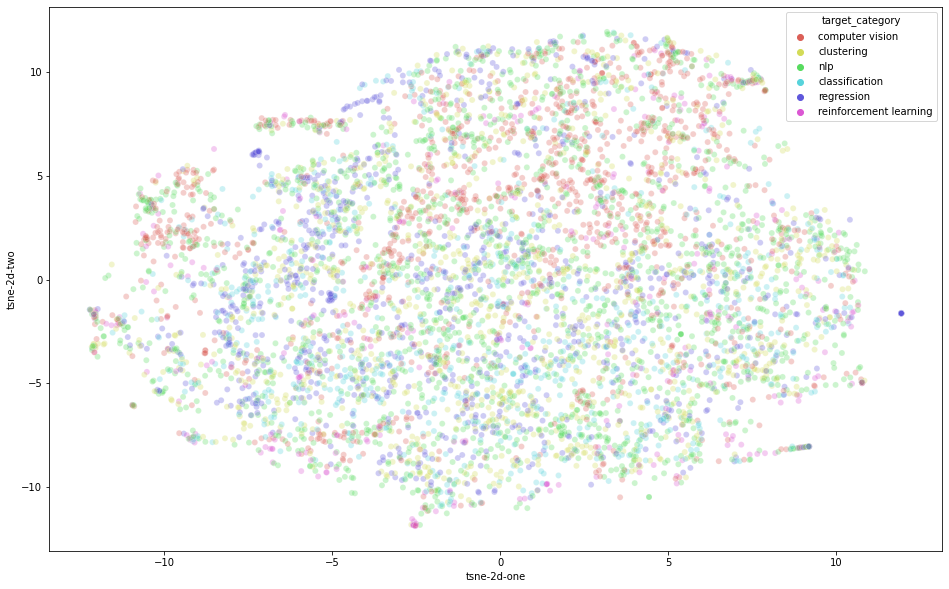

In [53]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target_category",
    palette=sns.color_palette("hls", 6),
    data=df_subset,
    legend="full",
    alpha=0.3
)